# 1. Linear Regression and FDR
- **Author**  : Sumashree Javaji
- **Dataset** : fundamentals.csv - contains annual SEC 10K fillings (2012-2016)

**Data Exploration and Visualization**
- Import data to a pandas dataframe
- Import necessary packages - Pandas , os
- Get high level overview of the data
- Check for null values & proceed with handling na's
- Plot graphs to undertsand the distribution & relation between variables

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Importing os library to change my current working directory to a new folder created for homework 1
import os
# os.chdir('') # setting cwd to a new path
os.getcwd() # checking my environment's current working directory

'/Users/sumashreejavaji/PycharmProjects/BAX_452_Machine Learning/HW_1'

In [3]:
SEC_df = pd.read_csv("fundamentals.csv") # Loads data from flat files to a pandas dataframe
SEC_df.head() # prints the first 5 rows of the dataset to get a macro level overview

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
# To check Data types of each column , memory consumption of the dataset & count of non null records
SEC_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [5]:
# Checking for the null values in all the columns and printing only the columns with nulls ordered by desc null count % 
null_info = pd.DataFrame({'Column': SEC_df.isnull().sum().index, 'Null Count': SEC_df.isnull().sum().values}).sort_values(by='Null Count' , ascending=False)
null_info['Null Percentage'] = (null_info['Null Count'] / len(SEC_df)) * 100
print(null_info[null_info['Null Count'] > 0])

                          Column  Null Count  Null Percentage
61                   Quick Ratio         299        16.788321
9                     Cash Ratio         299        16.788321
14                 Current Ratio         299        16.788321
78  Estimated Shares Outstanding         219        12.296463
77            Earnings Per Share         219        12.296463
76                      For Year         173         9.713644


In [6]:
#Drop rows with missing values| inplace = True - removing is done on the current DataFrame
SEC_df.dropna(inplace = True) 

unique_companies = SEC_df['Ticker Symbol'].unique() # Unique values for each column
unique_company_count = SEC_df['Ticker Symbol'].nunique() # count of unique values for each column

In [7]:
"We have 1299 filings for 360 unique companies :" , SEC_df.shape , unique_company_count 

('We have 1299 filings for 360 unique companies :', (1299, 79), 360)

#### Boxplot for Earnings Per Share of all the filings (IQR)
- EPS : Used to estimate a company's corporate value. Tells us how much profit a company earns for each share
- when a company's EPS is -ve, then it means it is losing money

In [8]:
# fixing the column names to support performing python
SEC_df_1= SEC_df.copy()
SEC_df_1.rename(columns=lambda x: x.replace('.', '').replace(',', '').replace(' ', '_').replace('/', '_').replace('&', '_').replace('-', '_'), inplace=True) 

In [9]:
SEC_df_1[SEC_df_1['Earnings_Per_Share']<0].Ticker_Symbol.unique() # list of negative EPS of companies

array(['AAL', 'ABC', 'ADSK', 'AEE', 'AMZN', 'APA', 'APC', 'ARNC', 'BBY',
       'BHI', 'BSX', 'CAG', 'CHK', 'CHTR', 'CNP', 'COG', 'CRM', 'CTL',
       'DVN', 'EIX', 'EOG', 'EQIX', 'ETR', 'FCX', 'FSLR', 'FTR', 'HAL',
       'HES', 'HOLX', 'HP', 'JNPR', 'LLL', 'LVLT', 'MRO', 'MU', 'MUR',
       'NBL', 'NEM', 'NFX', 'NOV', 'NWSA', 'OXY', 'PNR', 'QRVO', 'RRC',
       'SPGI', 'SPLS', 'SWN', 'TDC', 'TDG', 'TGT', 'UAL', 'VMC', 'VRTX',
       'WMB', 'WRK', 'XEC', 'YHOO'], dtype=object)

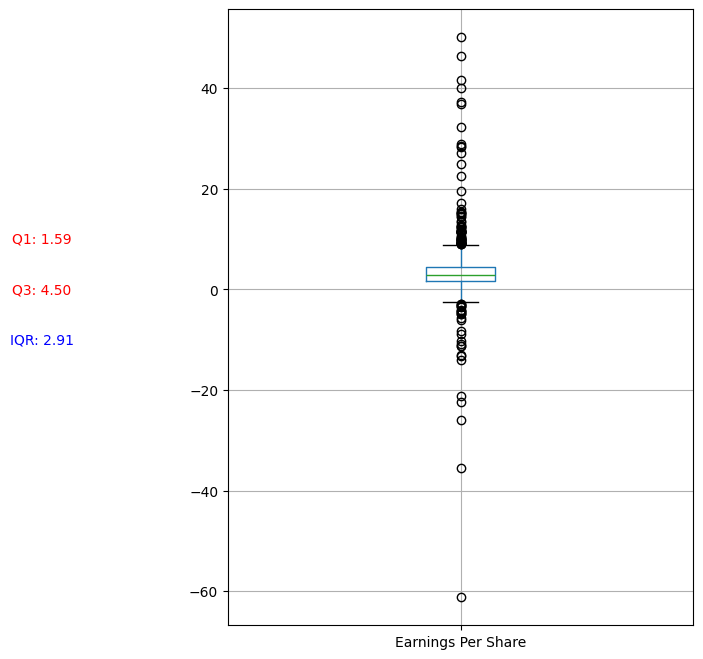

In [10]:
# Boxplot for Earnings Per Share of all the filings
plt.figure(figsize=(6,8))
SEC_df.boxplot(column='Earnings Per Share')

# Calculate IQR
q1 = np.percentile(SEC_df['Earnings Per Share'].dropna(), 25)
q3 = np.percentile(SEC_df['Earnings Per Share'].dropna(), 75)
iqr = q3 - q1

# displaying the IQR on the graph
plt.text(0.1, 10, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(0.1, 0, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='center', color='red')
plt.text(0.1, -10, f'IQR: {iqr:.2f}', horizontalalignment='center', verticalalignment='center', color='blue')

# Show the plot
plt.show()

#### Filtering Data : Lets say we are interested in companies who've had earnings per share > $20 at least once

company is earning >$20 in profit per share

In [11]:
sec_eps_gt_20 = SEC_df[SEC_df['Earnings Per Share']>20 ] #storing the data for EPS>20
Ticker_Symbol_eps_gt_20 = sec_eps_gt_20['Ticker Symbol'].unique() # getting unique companies list for eps>20
sec_eps_gt_20 = SEC_df[SEC_df['Ticker Symbol'].isin(Ticker_Symbol_eps_gt_20)] # filtering data for the above computed list of companies along with all their data from the past

# Printing some details about the data
'We have 19 filings of the 5 companies : ' , sec_eps_gt_20.shape , sec_eps_gt_20['Ticker Symbol'].nunique()

('We have 19 filings of the 5 companies : ', (19, 79), 5)

### Boxplot for filtered Companies
**Findings**
- from the box plots it's clear that though for one of the weeks the EPS (Earnings per Share) for PPG : PPG Industries, Inc. &  : Apple Inc
 has exceeded beyond 20, their median EPS every week are below 20
- so companies whose median EPS are always higher than 20 are
- PCLN : Booking Holdings Inc
- CF : CF Industries Holdings, Inc
- AZO : Autozone Inc

<Figure size 1000x500 with 0 Axes>

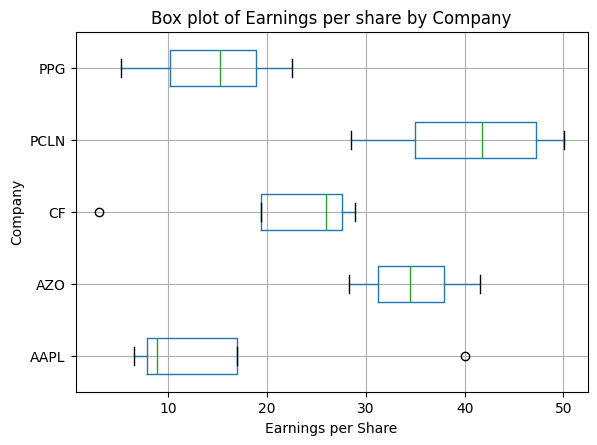

In [12]:
plt.figure(figsize=(10, 5))
sec_eps_gt_20.boxplot(column='Earnings Per Share', by='Ticker Symbol', vert=False)
plt.title("Box plot of Earnings per share by Company")
plt.xlabel("Earnings per Share")
plt.ylabel("Company")
plt.suptitle('')  # Suppress the default title to match the R output
plt.show()

#### Mean Earnings Per Share by Company

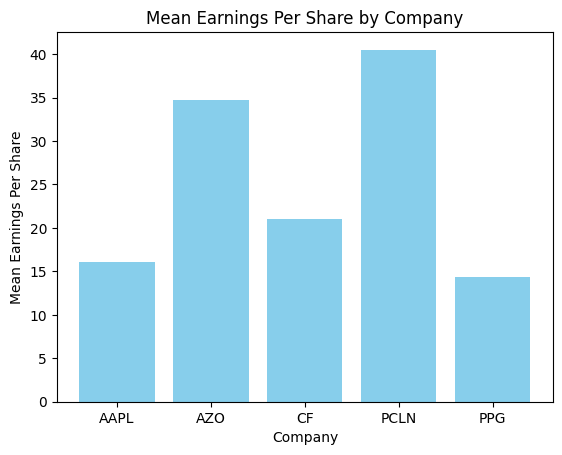

In [13]:
grouped_sec = sec_eps_gt_20.groupby('Ticker Symbol')['Earnings Per Share'].mean().reset_index()

# Create a bar chart
plt.bar(grouped_sec['Ticker Symbol'], grouped_sec['Earnings Per Share'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Mean Earnings Per Share')
plt.title('Mean Earnings Per Share by Company')
plt.show()

#### Mean Quick Ratio by Company

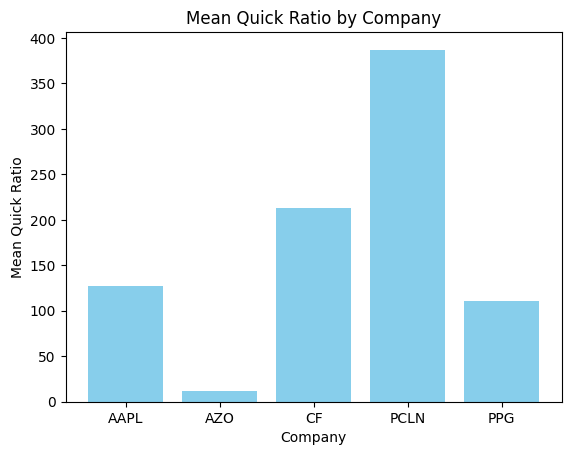

In [14]:
# Current Ratio: Total Current Assets/Total Current Liabilities
# Assessing the company's short-term liquidity
# sec_eps_gt_20['CR'] = sec_eps_gt_20['Total Current Assets']/sec_eps_gt_20['Total Current Liabilities']
grouped_sec = sec_eps_gt_20.groupby('Ticker Symbol')['Quick Ratio'].mean().reset_index()

# Create a bar chart
plt.bar(grouped_sec['Ticker Symbol'], grouped_sec['Quick Ratio'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Mean Quick Ratio')
plt.title('Mean Quick Ratio by Company')
plt.show()

#### Total Current Assets and Liabilities by Company

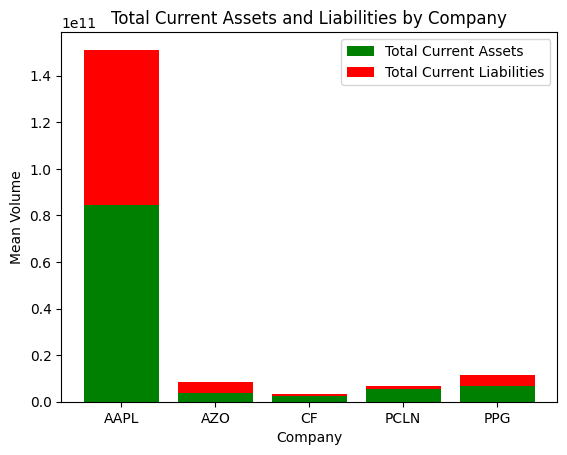

In [15]:
# Group by Company and calculate the mean # of Tot Curr Assets and Tot Curr Liabilities
grouped_df = sec_eps_gt_20.groupby('Ticker Symbol')[['Total Current Assets', 'Total Current Liabilities']].mean().reset_index()

# Create a stacked bar chart
plt.bar(grouped_df['Ticker Symbol'], grouped_df['Total Current Assets'], label='Total Current Assets', color='green')
plt.bar(grouped_df['Ticker Symbol'], grouped_df['Total Current Liabilities'], label='Total Current Liabilities', bottom=grouped_df['Total Current Assets'], color='red')

plt.xlabel('Company')
plt.ylabel('Mean Volume')
plt.title('Total Current Assets and Liabilities by Company')
plt.legend()
plt.show()


#### Scatter Plot : Earnings Per Share

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


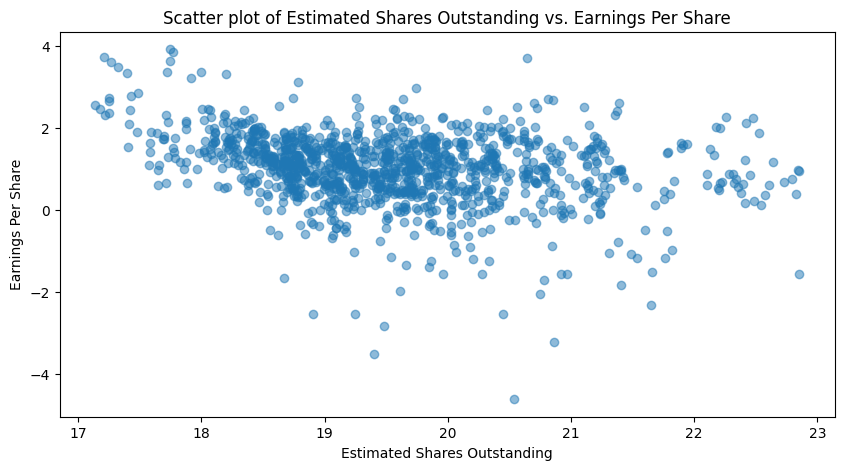

In [16]:
# Scatter plot for miles vs. price
plt.figure(figsize=(10, 5))
plt.scatter(np.log(SEC_df['Estimated Shares Outstanding']), np.log(SEC_df['Earnings Per Share']), alpha=0.5) # Applying log to standardise the results on both x & y scales and get a better picture of the data
plt.title("Scatter plot of Estimated Shares Outstanding vs. Earnings Per Share")
plt.xlabel("Estimated Shares Outstanding")
plt.ylabel("Earnings Per Share")
plt.show()

### **Regression Analysis**
- Use the statsmodels library in Python to perform regression
- Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding.

In [17]:
# pip install seaborn
import statsmodels.formula.api as smf
import seaborn as sns

In [18]:
SEC_df.rename(columns=lambda x: x.replace('.', '').replace(',', '').replace(' ', '_').replace('/', '_').replace('&', '_').replace('-', '_'), inplace=True) # fixing the column names to support performing python
SEC_df.drop(SEC_df.columns[:3], axis=1, inplace=True) #dropping the 1st three columns as we do not need them for model development

##### **Create a new DataFrame with only continuous columns - Correlation Matrix**

In [19]:
sec_df = SEC_df
continuous_columns = sec_df.select_dtypes(include=['float64', 'int64']).columns #filtering for only int & float columns
sec_df_continuous = sec_df[continuous_columns]
sec_df_continuous

,Accounts_Payable,Accounts_Receivable,Add'l_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities___Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.000000e+00,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.000000e+00,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-2.709500e+07,2012.0,5.29,7.328355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,2.255000e+08,-40400000.0,-3.480000e+07,11.0,-3.423000e+08,4.330700e+09,166.0,1.083300e+09,-164600000.0,2700000.0,...,4.313300e+09,1.024000e+09,6.549900e+09,3.108100e+09,9.658000e+09,4.673300e+09,-6.183700e+09,2014.0,4.26,1.690845e+08
1772,4.320000e+08,-56100000.0,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,1.459300e+09,-205400000.0,3000000.0,...,5.862900e+09,1.617900e+09,9.887900e+09,1.733160e+10,2.721950e+10,5.997800e+09,-6.329100e+09,2015.0,0.78,1.884615e+08
1777,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,-178000000.0,5000000.0,...,3.357000e+09,1.415000e+09,9.400000e+08,5.618000e+09,6.558000e+09,4.561000e+09,0.000000e+00,2013.0,1.01,4.990099e+08
1778,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,-110000000.0,5000000.0,...,3.465000e+09,1.086000e+09,1.311000e+09,5.277000e+09,6.588000e+09,4.785000e+09,0.000000e+00,2014.0,1.16,5.025862e+08


In [20]:
cor=sec_df_continuous.corr()
cor #since we have huge number of columns, correlation matrix is hard to interpret from. therefore, let's try to filter for corr >0.7 and see if that helps us

,Accounts_Payable,Accounts_Receivable,Add'l_income_expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities___Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
Accounts_Payable,1.000000,-0.203818,0.310313,-0.025123,-0.618239,0.273143,-0.126720,0.665078,-0.364830,0.278696,...,0.752422,0.928197,0.688301,0.774730,0.793209,0.884285,-0.442801,-0.011775,0.141707,0.518993
Accounts_Receivable,-0.203818,1.000000,-0.016543,0.015093,0.047639,-0.071437,-0.015310,-0.191034,0.186528,-0.125804,...,-0.246745,-0.209893,-0.054348,-0.226410,-0.170391,-0.142501,-0.118040,0.022187,-0.093006,-0.174724
Add'l_income_expense_items,0.310313,-0.016543,1.000000,-0.013123,-0.395192,0.049078,0.021470,0.204048,-0.079553,0.118956,...,0.232254,0.276414,0.425384,0.242796,0.336311,0.319760,-0.366070,0.003534,0.097412,0.182738
After_Tax_ROE,-0.025123,0.015093,-0.013123,1.000000,0.025168,-0.018456,0.020884,-0.015748,0.016638,-0.014609,...,-0.032569,-0.030866,-0.059216,-0.028164,-0.043142,-0.026600,0.005244,0.002999,-0.043057,-0.030411
Capital_Expenditures,-0.618239,0.047639,-0.395192,0.025168,1.000000,-0.337971,0.112247,-0.454440,0.121384,-0.207864,...,-0.467931,-0.605792,-0.816270,-0.744186,-0.826829,-0.660087,0.497833,-0.009117,-0.022182,-0.487570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total_Revenue,0.884285,-0.142501,0.319760,-0.026600,-0.660087,0.221914,-0.120667,0.525032,-0.316988,0.234047,...,0.662996,0.827088,0.700258,0.709372,0.755588,1.000000,-0.478269,0.009965,0.128363,0.498266
Treasury_Stock,-0.442801,-0.118040,-0.366070,0.005244,0.497833,-0.196009,0.065004,-0.254218,0.173972,-0.327256,...,-0.340901,-0.470899,-0.544822,-0.466625,-0.532251,-0.478269,1.000000,-0.007736,-0.114705,-0.368586
For_Year,-0.011775,0.022187,0.003534,0.002999,-0.009117,0.007712,0.018620,0.005118,-0.006275,0.008309,...,0.003589,-0.002588,0.011305,0.007512,0.009629,0.009965,-0.007736,1.000000,0.011543,0.005782
Earnings_Per_Share,0.141707,-0.093006,0.097412,-0.043057,-0.022182,-0.083429,0.025549,0.089345,-0.079040,0.083233,...,0.101074,0.111350,0.095579,0.057079,0.077212,0.128363,-0.114705,0.011543,1.000000,-0.051850


##### **Filtering for correlation greater than 0.7 and printing only those variables sets**
- Here I'm interested in checking for correlation between **Estimated_Shares_Outstanding** & other variables of the dataset

In [21]:
highly_correlated_features = []

for j in range(len(cor.columns)):
    if abs(cor.iloc[-1, j]) > 0.7:
        colname_i = cor.columns[-1]
        colname_j = cor.columns[j]
        print([colname_i , colname_j])

['Estimated_Shares_Outstanding', 'Net_Cash_Flow_Operating']
['Estimated_Shares_Outstanding', 'Total_Assets']
['Estimated_Shares_Outstanding', 'Total_Current_Assets']
['Estimated_Shares_Outstanding', 'Total_Equity']
['Estimated_Shares_Outstanding', 'Total_Liabilities___Equity']
['Estimated_Shares_Outstanding', 'Estimated_Shares_Outstanding']


#### Regressing Estimated_Shares_Outstanding on all the fileds in the dataset to check for the correlation

In [22]:
sec_model = smf.ols(formula='Estimated_Shares_Outstanding ~  Accounts_Payable + Accounts_Receivable + After_Tax_ROE + Capital_Expenditures + Capital_Surplus + Cash_Ratio + Cash_and_Cash_Equivalents + Changes_in_Inventories + Common_Stocks + Cost_of_Revenue + Current_Ratio + Deferred_Asset_Charges + Deferred_Liability_Charges + Depreciation + Earnings_Before_Interest_and_Tax + Earnings_Before_Tax + Effect_of_Exchange_Rate + Equity_Earnings_Loss_Unconsolidated_Subsidiary + Fixed_Assets + Goodwill + Gross_Margin + Gross_Profit + Income_Tax + Intangible_Assets + Interest_Expense + Inventory + Investments + Liabilities + Long_Term_Debt + Long_Term_Investments + Minority_Interest + Misc_Stocks + Net_Borrowings + Net_Cash_Flow + Net_Cash_Flow_Operating + Net_Cash_Flows_Financing + Net_Cash_Flows_Investing + Net_Income + Net_Income_Adjustments + Net_Income_Applicable_to_Common_Shareholders + Net_Income_Cont_Operations + Net_Receivables + Non_Recurring_Items + Operating_Income + Operating_Margin + Other_Assets + Other_Current_Assets + Other_Current_Liabilities + Other_Equity + Other_Financing_Activities + Other_Investing_Activities + Other_Liabilities + Other_Operating_Activities + Other_Operating_Items + Pre_Tax_Margin + Pre_Tax_ROE + Profit_Margin + Quick_Ratio + Research_and_Development + Retained_Earnings + Sale_and_Purchase_of_Stock + Sales_General_and_Admin + Short_Term_Debt___Current_Portion_of_Long_Term_Debt + Short_Term_Investments + Total_Assets + Total_Current_Assets + Total_Current_Liabilities + Total_Equity + Total_Liabilities + Total_Liabilities___Equity + Total_Revenue + Treasury_Stock + For_Year + Earnings_Per_Share' , data=sec_df).fit()
sec_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated_Shares_Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     99.81
Date:                          Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                                  20:54:16   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1226   BIC:                         5.554e+04
Df Model:                                    72                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                            7.295e+08      1e+09      0.728      0.467   -1.24e+09     2.7e+09
Accounts_Payable                                     -183.5322    238.900     -0.768      0.442    -652.231     285.167
Accounts_Receivable                                    -0.0703      0.057     -1.242      0.214      -0.181       0.041
After_Tax_ROE                                       -6.719e+05      5e+05     -1.344      0.179   -1.65e+06    3.09e+05
Capital_Expenditures                                    0.8835      2.395      0.369      0.712      -3.816       5.583
Capital_Surplus                                         0.0155      0.009      1.717      0.086      -0.002       0.033
Cash_Ratio                                           6.907e+05   3.83e+05      1.805      0.071   -6.01e+04    1.44e+06
Cash_and_Cash_Equivalents                              -1.2468      0.617     -2.022      0.043      -2.457      -0.037
Changes_in_Inventories                                 -0.0855      0.060     -1.424      0.155      -0.203       0.032
Common_Stocks                                          -0.0008      0.010     -0.086      0.931      -0.020       0.018
Cost_of_Revenue                                     -3502.0835   4806.808     -0.729      0.466   -1.29e+04    5928.397
Current_Ratio                                       -2.083e+05   2.94e+05     -0.708      0.479   -7.85e+05    3.69e+05
Deferred_Asset_Charges                                 -0.0594      0.989     -0.060      0.952      -2.000       1.881
Deferred_Liability_Charges                              0.0085      0.099      0.086      0.932      -0.186       0.203
Depreciation                                           -0.0834      0.057     -1.472      0.141      -0.195       0.028
Earnings_Before_Interest_and_Tax                       22.7305     39.523      0.575      0.565     -54.809     100.270
Earnings_Before_Tax                                   -23.0168     39.522     -0.582      0.560    -100.556      54.522
Effect_of_Exchange_Rate                                -0.0237      0.166     -0.143      0.886      -0.349       0.301
Equity_Earnings_Loss_Unconsolidated_Subsidiary          0.0789      0.063      1.254      0.210      -0.045       0.202
Fixed_Assets                                           -0.0574      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0643      0.989     -0.065      0.948      -2.004       1.876
Gross_Margin                                         -1.58e+05   7.36e+05     -0.215      0.8

### **Inferences from Linear Regression Model :**
- **F statistic** - tells us the overall validation of the our model and since the Fstatistic is high compared to the Degrees of freedom of the model & p-value of F stat is 0.00 which strongly implies that our model is statistically significant.
- **Durbin Watson** - as the value is closer to 2 , it implies that there is no autocorrelation (since the data is not time series, this is expected. as we dropped the period column)
- **Rsquared** - is 85.4 , i.e. the model explains 85.4% of the variation in Estimated_Shares_Outstanding

## **Multicollinearity in Linear Regression:**

### **Consequences of multicollinearity**
- perfect multicollinearity : Coefficients are inderminate.
if we observe perfect linear relationship among explanatory variables, we cannot obtain unique estimates of all parameters. Since we cannot obtain their unique estimates, we cannot draw statistical inferences about them from a given sample.
- Imperfect Multicollinearity : we cannot determine the coefficients with great precision
- Large variances and standard errors
- compare std error of Price in Simple regression versus Price in Multiple regression.
- Insignificant t-ratios
- High R-squared but t-values of few variables is significant:
- OLS estimators and std errors are very sensitive to small changes in data - unstable.
- Wrong signs of regression coefficients (when compared to theoretical context)
### **Detecting Multicollinearity**
- High pairwise correlations among regressors.
- Pairwise correlations among the 𝑥 variables is larger than the largest of the correlations between the 𝑦
variable and the 𝑥 variables
- Variance Inflation Factors (VIFs)
- Eigenvalues and condition number
### **Remedial Measures**
- Remove variables which are highly correlated with others if the variables do not add value theoretically.(Be cautious about model misspecifications and potentially underfitting the model)
- Re-express your explanatory variables - like finding differences or averages between the variables


In [23]:
# EDA: Create Correlation matrix and analyse the corr>0.9 variables
highly_correlated_features = []
for i in range(len(cor.columns)):
    for j in range(len(cor.columns)):
        if ((cor.columns[i]!=cor.columns[j]) and abs(cor.iloc[i, j]) >0.9):
            colname_i = cor.columns[i]
            colname_j = cor.columns[j]
            print([colname_i , colname_j])

['Accounts_Payable', 'Total_Current_Liabilities']
['After_Tax_ROE', 'Pre_Tax_ROE']
['Capital_Expenditures', 'Fixed_Assets']
['Cash_Ratio', 'Quick_Ratio']
['Cost_of_Revenue', 'Total_Revenue']
['Current_Ratio', 'Quick_Ratio']
['Earnings_Before_Interest_and_Tax', 'Earnings_Before_Tax']
['Earnings_Before_Interest_and_Tax', 'Income_Tax']
['Earnings_Before_Interest_and_Tax', 'Net_Cash_Flow_Operating']
['Earnings_Before_Interest_and_Tax', 'Net_Income']
['Earnings_Before_Interest_and_Tax', 'Net_Income_Applicable_to_Common_Shareholders']
['Earnings_Before_Interest_and_Tax', 'Net_Income_Cont_Operations']
['Earnings_Before_Interest_and_Tax', 'Operating_Income']
['Earnings_Before_Tax', 'Earnings_Before_Interest_and_Tax']
['Earnings_Before_Tax', 'Income_Tax']
['Earnings_Before_Tax', 'Net_Cash_Flow_Operating']
['Earnings_Before_Tax', 'Net_Income']
['Earnings_Before_Tax', 'Net_Income_Applicable_to_Common_Shareholders']
['Earnings_Before_Tax', 'Net_Income_Cont_Operations']
['Earnings_Before_Tax', 'Ope

### **P-Value Analysis** 

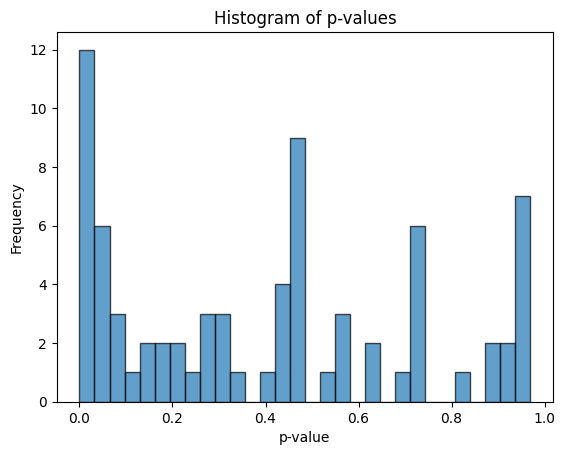

In [24]:
#Extract p-values from the model
pv=sec_model.pvalues
# set the histrogram
plt.hist(pv, bins=30, edgecolor='black', alpha=0.7)
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
#Plot the histogram
plt.show()

The peak near 0.0 indicates the possibility of false discoveries. The histogram is not uniform with other peaks as well so, the percentage of null p-values is low here.

### **False Discovery Rate Control with BH Procedure**
According to the result , Number of p-values(significant variables) below alpha: 7

Alpha: 0.000553547158320006


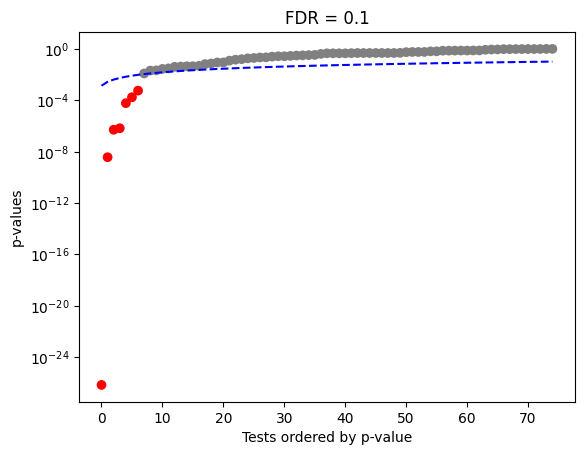

Number of p-values below alpha: 7


In [25]:
import numpy as np
import matplotlib.pyplot as plt
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)

  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

  return alpha

q_value = 0.1
p_values = sec_model.pvalues
alpha_threshold = fdr(p_values, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values) <= alpha_threshold)
print(f"Number of p-values below alpha: {p_below_alpha}")

### **Sensitivity Analysis of FDR Control**
- The sensitivity analysis shows that six variables remain constant when I set the q-value to 0.01, indicating that these variables are somewhat robust. 
- When I set the q-value to 0.2, three significant variables were added, suggesting that the significance of some of the variables may not be robust enough, and that they may have been incorrectly identified as significant false-positive results under the looser FDR control.

- Applying the Benjamini-Hochberg (BH) procedure at different q values  will yield different numbers of variables deemed significant.
- q : is the maximum proportion of false discoveries or false positives that is considered acceptable
- Lower q-values (More stringent):
When you lower the q-value, the BH procedure becomes more stringent, leading to fewer variables being declared significant. This reduces the chance of false positives but increases the chance of false negatives (failing to identify true effects).
If many variables that were significant at a higher q-value are no longer significant at a lower q-value, this may indicate that the significance of those variables was marginal.
- Higher q-values (Less stringent):
Increasing the q-value allows more variables to be deemed significant, accepting a higher rate of false discoveries. This can be useful if the cost of missing a true effect is high, but it risks including more false positives.
- Variables that remain significant across a wide range of q-values are more likely to be truly associated with the response variable. Their significance is robust to the stringency of the FDR control


Alpha: 0.000553547158320006


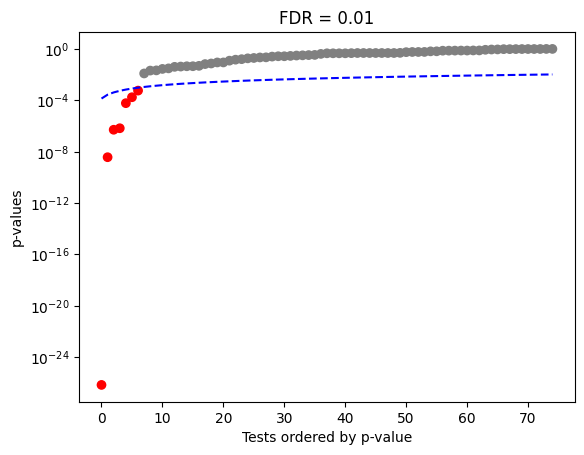

When q-value set to 0.01, Number of p-values below alpha: 7
Alpha: 0.029689248881842854


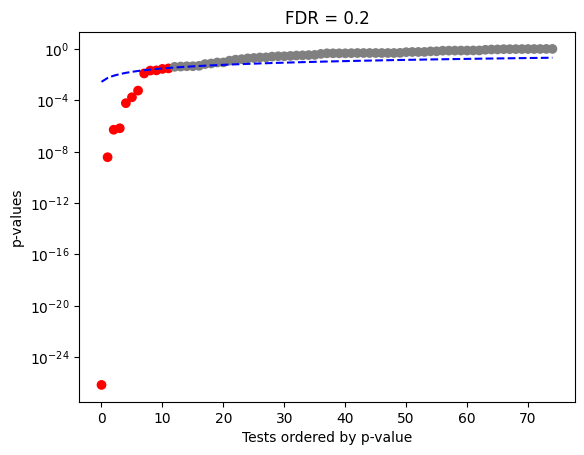

When q-value set to 0.2, Number of p-values below alpha: 12


In [26]:
# Set the q value to 0.01
q_value = 0.01
alpha_threshold = fdr(p_values, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values) <= alpha_threshold)
print(f"When q-value set to 0.01, Number of p-values below alpha: {p_below_alpha}")

# Set the q value to 0.2
q_value = 0.2
alpha_threshold = fdr(p_values, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values) <= alpha_threshold)
print(f"When q-value set to 0.2, Number of p-values below alpha: {p_below_alpha}")

In [27]:
from sklearn.preprocessing import PolynomialFeatures

### **Interaction Terms**
 Adding interaction terms between pairs of predictors
- Result : Interaction terms are important in the context of predicting Estimated Share Outstanding as the effect of one metric on Estimated Share Outstanding might be dependent on another metric. 
For example, effect of Capital Expenditure on Estimated Share Outstanding is dependent on the intangible assets the company has.

In [28]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('fundamentals.csv')
columns_to_exclude = ['Unnamed: 0', 'Ticker Symbol','Period Ending']

# Consider only required columns, 1-25 (X) and last column (Y)
df = df.drop(columns=columns_to_exclude)
df = df.iloc[:, list(range(25)) + [-1]]

# Drop rows with null values
df = df.dropna()

# Take first 25 columns as X a last column of 'Estimated Shares Outstanding' as Y
X = df.iloc[:, list(range(25))]
Y = df.iloc[:, [-1]]

# Create interaction terms between variables in the daataset
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Get feature names for all interaction terms
poly_feature_names = poly.get_feature_names_out(X.columns)

# Create a DataFrame with interaction terms and their names
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term for the intercept
df_poly = sm.add_constant(df_poly)

# Ensure indices are aligned
Y = Y.reset_index(drop=True)
df_poly = df_poly.reset_index(drop=True)

# Fit an OLS regression model
model = sm.OLS(Y, df_poly).fit()

# Display the summary of the regression results
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                                  20:54:19   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
                                                                                      coef    std err         

### **Model Evaluation with Interaction Terms**
Calculate adjusted R^2 to evaluate model performance
- Interpretation : Since adjusted R-squared is higher for model with interaction terms (92.6%) as compared to model without interaction terms (84.6%), we can claim that including interaction terms improved the model. The model with interaction terms explains variability in Estimated Shares Outstanding to a higher extent than the model without interaction terms.

In [29]:
#Model Evaluation
adjusted_r_squared_interaction = model.rsquared_adj
print(f"Adjusted R-squared value for model with interaction terms: {round(adjusted_r_squared_interaction,2)}")

adjusted_r_squared_no_interaction = sec_model.rsquared_adj
print(f"Adjusted R-squared value for model without interaction terms: {round(adjusted_r_squared_no_interaction,2)}")


Adjusted R-squared value for model with interaction terms: 0.93
Adjusted R-squared value for model without interaction terms: 0.85


### **FDR Analysis with Interaction Terms**
- Analyse the histogram of the p-values for the new model including interaction terms. Check differences from the histogram created for the original model.
- Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. Note down the number of significant predictors post including both main effects and interaction effects
- Compare these results with those obtained from the original model

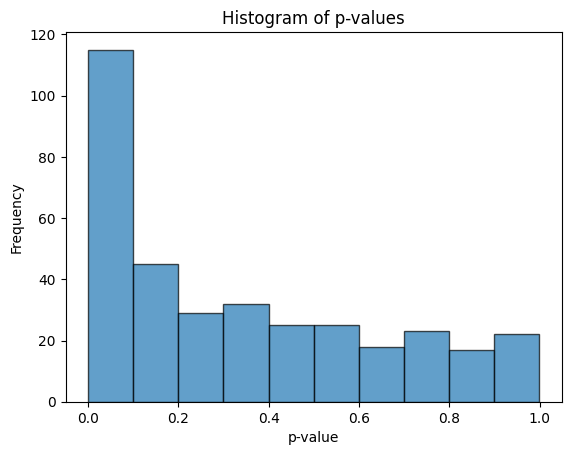

In [30]:
#Extract p-values from the new model and plot a histogram
new_pv=model.pvalues
# set the histrogram
plt.hist(new_pv, bins=10, edgecolor='black', alpha=0.7)
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
#Plot the histogram
plt.show()

Alpha: 0.0184899140657895


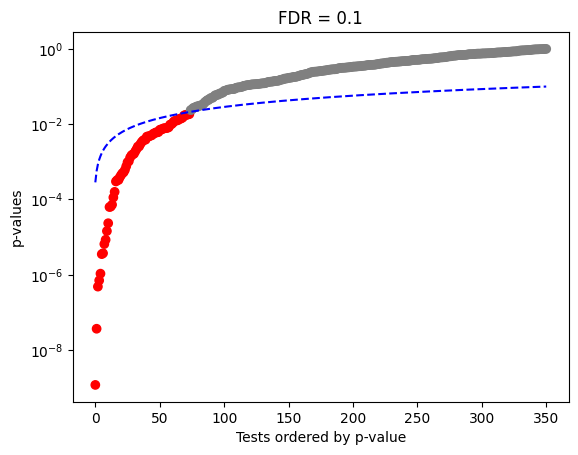

Number of p-values below alpha: 74


In [31]:
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)

  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N

  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")

  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()

  return alpha

q_value = 0.1
p_values_new = model.pvalues
alpha_threshold = fdr(p_values_new, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values_new) <= alpha_threshold)
print(f"Number of p-values below alpha: {p_below_alpha}")

**Interpretations :**
- **Comparision :** New histogram on the p values from the new model shows skewed results close to zero which means that there are few false positives
but the rest of the values have uniform distribution when compared to the original model (original mode does not have uniform distribution for the values away from zero)

- **Interaction terms** are important in the context of predicting Estimated Share Outstanding as the effect of one metric on Estimated Share Outstanding might be dependent
on another metric. For example, effect of Capital Expenditure on Estimated Share Outstanding is dependent on the intangible assets the company has.

- Adding Interaction Terms has increased our significant predictor variables from 7 to 8

**Explanation:**
- When the q-value was set to 0.1, 74 variables had p-values below the significance threshold (alpha).
When the q value is decreased to 0.01, only 24 variables remained significant.
When the q value is increased to 0.2, the number of significant variables increased to 92
- These observations illustrate:
Only a fraction of the variables remain significant under tighter FDR control (lower q-values), suggesting that these variables are statistically more robust relative to the others. The new model has increased FDR instability due to the high number of variables, and the number of significant variables changes significantly depending on the q-value.

Alpha: 0.000553547158320006


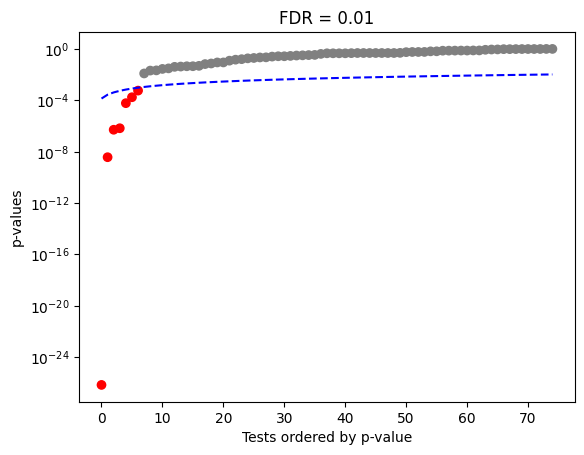

When q-value set to 0.01, Number of p-values below alpha: 7
Alpha: 0.05012653070357871


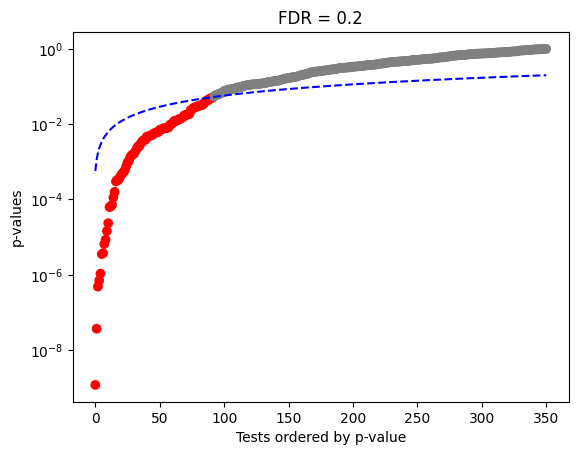

When q-value set to 0.2, Number of p-values below alpha: 92


In [32]:
# Set the q value to 0.01
q_value = 0.01
alpha_threshold = fdr(p_values, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values) <= alpha_threshold)
print(f"When q-value set to 0.01, Number of p-values below alpha: {p_below_alpha}")

# Set the q value to 0.2
p_values_new = model.pvalues
q_value = 0.2
alpha_threshold = fdr(p_values_new, q_value, plotit=True)

p_below_alpha = np.sum(np.array(p_values_new) <= alpha_threshold)
print(f"When q-value set to 0.2, Number of p-values below alpha: {p_below_alpha}")